In [172]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt 
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage
from sklearn import metrics as mt

In [173]:
al = pd.read_csv("EastWestAirlines.csv")
al

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [174]:
print(al.info())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB
None


In [175]:
al.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [176]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
air = pd.DataFrame(scaler.fit_transform(al.iloc[:,1:]))
air    

,0,1,2,3,4,5,6,7,8,9,10
0,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918
...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.547079,-0.186299,-0.769578,-0.098242,-0.062767,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120,1.303918
3995,-0.091465,-0.186299,-0.769578,-0.098242,-0.062767,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994,1.303918
3996,-0.000043,-0.186299,0.683121,-0.098242,-0.062767,0.343804,-0.375096,-0.328603,-0.362168,-1.315604,1.303918
3997,-0.185607,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,0.028531,-0.098503,-1.316088,-0.766919


# applying hierarchail clustering method

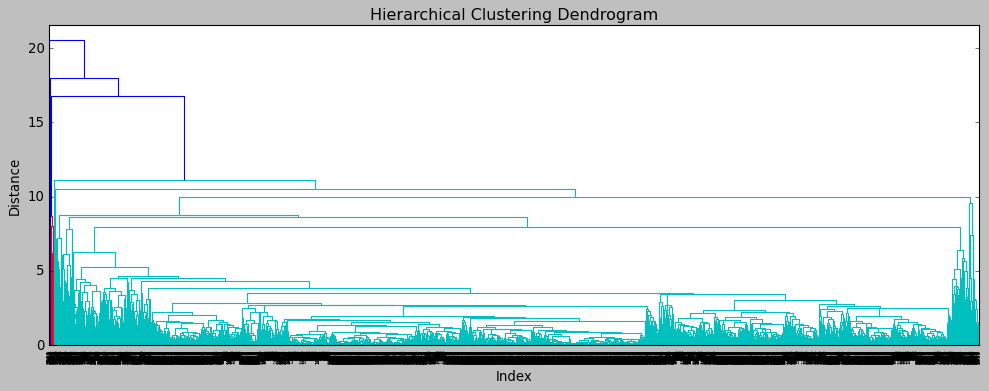

In [177]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram 
#p = np.array(df_norm) # converting into numpy array format 
z = linkage(air, method="average",metric="euclidean")
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(
    z,
    #leaf_rotation=6.,  # rotates the x axis labels
    #leaf_font_size=15.,  # font size for the x axis labels
)
plt.show()       

In [178]:
## We could not predict the clusters from the above dendrogram structure.

# applying K means clustering method

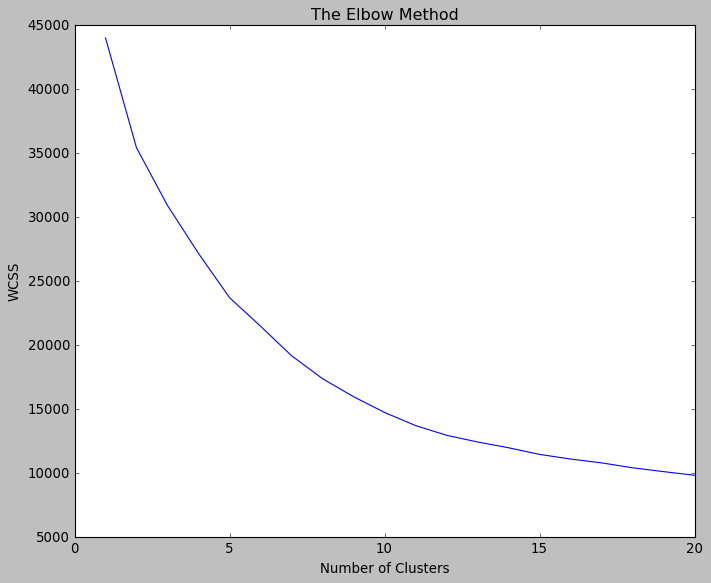

In [179]:
from sklearn.cluster import KMeans
fig = plt.figure(figsize=(10, 8))
WCSS = []
for i in range(1, 21):
    clf = KMeans(n_clusters=i)
    clf.fit(air)
    WCSS.append(clf.inertia_) # inertia is another name for WCSS
plt.plot(range(1, 21), WCSS)
plt.title('The Elbow Method')
plt.ylabel('WCSS')
plt.xlabel('Number of Clusters')
plt.show()  

In [180]:
clf = KMeans(n_clusters=5)
y_kmeans = clf.fit_predict(air)  

In [181]:
WCSS

[43988.999999999985,
 35409.50739803796,
 30899.21640879058,
 27154.020895585538,
 23701.18880496275,
 21470.860946462697,
 19165.86145865566,
 17369.218083251086,
 15963.581173721808,
 14732.22988234744,
 13705.524765615986,
 12947.2209537459,
 12424.62245425024,
 11971.852846043284,
 11453.51782672972,
 11092.582179929394,
 10791.013033743366,
 10409.348666461878,
 10107.059874538325,
 9823.636441311592]

In [182]:
clf.labels_ 

array([0, 0, 0, ..., 1, 0, 0])

In [183]:
y_kmeans 

array([0, 0, 0, ..., 1, 0, 0])

In [184]:
clf.cluster_centers_ 

array([[-0.29533202, -0.06294093, -0.60520921, -0.09824189, -0.06072573,
        -0.51912212, -0.49852693, -0.18538108, -0.19819164, -0.20799912,
        -0.35357684],
       [ 0.43093606,  0.02501371,  1.19071149, -0.09824189, -0.05473125,
         0.91295536,  0.74322746, -0.07968999, -0.09085189,  0.3737552 ,
         0.5795311 ],
       [ 1.18115618,  0.85944791,  0.09179794, -0.09824189, -0.06276658,
         0.61317096,  1.61154347,  3.606713  ,  3.86491554,  0.2888319 ,
         0.90568019],
       [-0.04688966, -0.1562356 , -0.66822727,  9.03825361, -0.06276658,
        -0.10166533,  0.61785114,  0.0875494 ,  0.22034681, -0.07246398,
         0.05178388],
       [ 0.63971926, -0.08443292,  1.0220844 , -0.09824189, 15.64629931,
         3.17969131,  1.71461374,  0.03329269,  0.05969539,  0.23987261,
         0.33752735]])

In [185]:
clf.inertia_

23700.510452910927

In [186]:
kc=pd.Series(y_kmeans)  # converting numpy array into pandas series object 
al['clust_k']=kc # creating a  new column and assigning it to new column 
al

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clust_k
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [187]:
al['clust_k'].value_counts()

0    2510
1    1275
2     156
3      43
4      15
Name: clust_k, dtype: int64

<AxesSubplot:xlabel='clust_k', ylabel='Award?'>

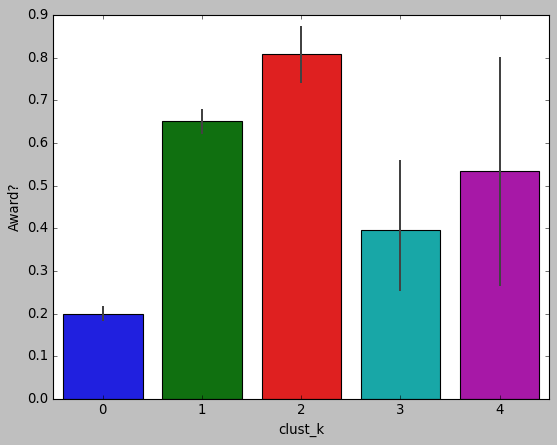

In [188]:
import seaborn as sns
sns.barplot(data=al, x='clust_k',y='Award?')

<AxesSubplot:xlabel='clust_k', ylabel='Bonus_miles'>

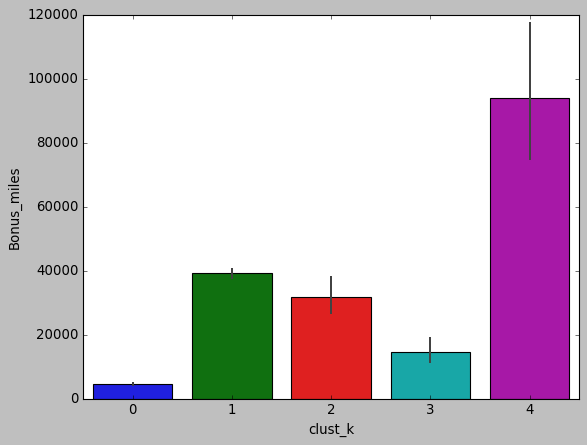

In [189]:
sns.barplot(data=al, x='clust_k',y='Bonus_miles')

<AxesSubplot:xlabel='clust_k', ylabel='Bonus_trans'>

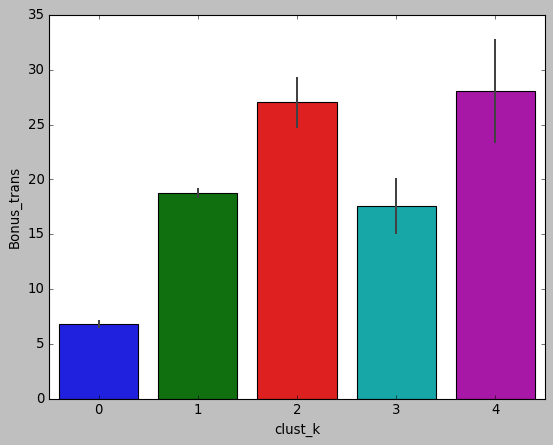

In [190]:
sns.barplot(data=al, x='clust_k',y='Bonus_trans')

In [191]:
al.iloc[:,1:12].groupby(al.clust_k).mean()  

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
clust_k,,,,,,,,,,,
0,43842.768127,95.425498,1.226295,1.000000,1.000398,4609.112351,6.814741,200.515936,0.621912,3689.066932,0.199602
1,117023.765490,163.464314,3.698824,1.000000,1.001569,39190.844706,18.738824,348.487059,1.029020,4890.317647,0.650196
2,192618.243590,808.955128,2.185897,1.000000,1.000000,31951.666667,27.076923,5509.576923,16.032051,4714.961538,0.807692
3,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349
4,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333


In [192]:
import matplotlib.pyplot as plt
plt.style.use('classic')  

Text(0.5, 1.0, 'Clusters using KMeans')

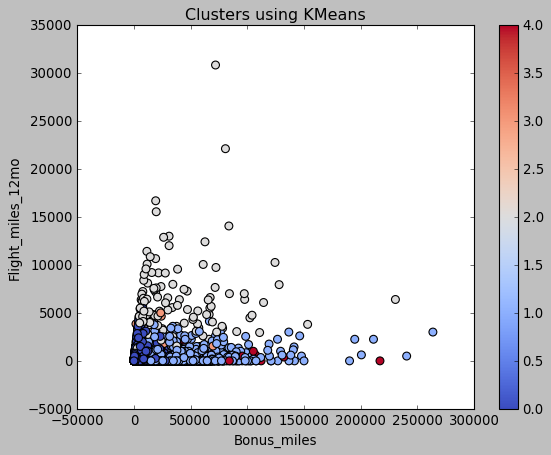

In [193]:
al.plot(x="Bonus_miles",y ="Flight_miles_12mo",c=clf.labels_,kind="scatter",s=50 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using KMeans') 

Text(0.5, 1.0, 'Clusters using KMeans')

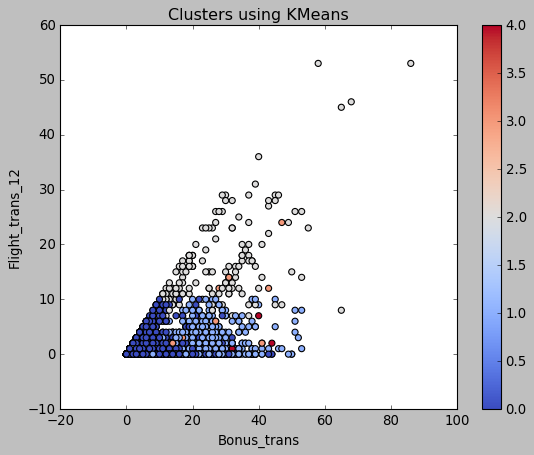

In [194]:
al.plot(x="Bonus_trans",y ="Flight_trans_12",c=clf.labels_,kind="scatter",s=30 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using KMeans') 

In [195]:
mt.silhouette_score(air, y_kmeans)

0.32433823191955125

In [ ]:
##we can see above are 5 cluster groups based on k means clustering

# DBscan method

In [196]:
df1 = al.iloc[:,1:12]
df1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [197]:
array=df1.values
array  

array([[28143,     0,     1, ...,     0,  7000,     0],
       [19244,     0,     1, ...,     0,  6968,     0],
       [41354,     0,     1, ...,     0,  7034,     0],
       ...,
       [73597,     0,     3, ...,     0,  1402,     1],
       [54899,     0,     1, ...,     1,  1401,     0],
       [ 3016,     0,     1, ...,     0,  1398,     0]], dtype=int64)

In [198]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array) 
X  

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [199]:
from sklearn.neighbors import NearestNeighbors  

In [200]:
neigh = NearestNeighbors(n_neighbors=24)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

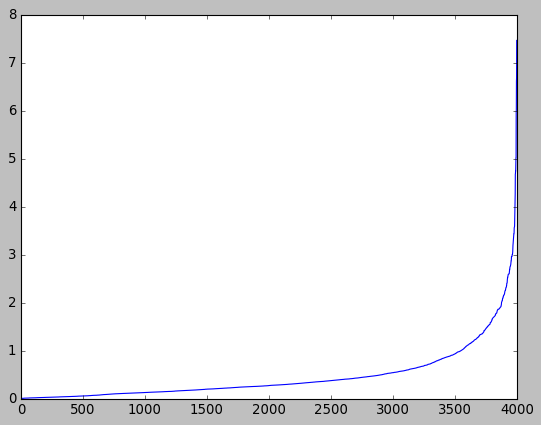

In [201]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)  

In [202]:
dbscan = DBSCAN(eps=1.35,min_samples=13)
dbscan.fit(X) 

DBSCAN(eps=1.35, min_samples=13)

In [203]:
#Noisy samples are given the label -1.
dbscan.labels_  

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [204]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])  

In [205]:
cl

,cluster
0,0
1,0
2,0
3,0
4,1
...,...
3994,1
3995,1
3996,1
3997,0


In [206]:
cl['cluster'].value_counts()

 0    2358
 1    1160
-1     468
 2      13
Name: cluster, dtype: int64

Text(0.5, 1.0, 'Clusters using dbscan')

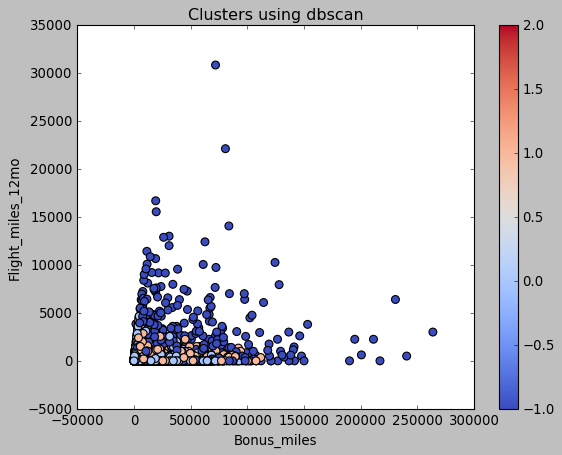

In [207]:
al.plot(x="Bonus_miles",y ="Flight_miles_12mo",c=dbscan.labels_,kind="scatter",s=50 ,cmap=plt.cm.coolwarm) 
plt.title('Clusters using dbscan')  

In [208]:
dl = dbscan.labels_ 


In [209]:

mt.silhouette_score(X, dl) 

0.23898680803238664

In [ ]:
## We can see above are 3 cluster groups based on DB scan method.